In [13]:
%matplotlib inline

In [93]:
from tensorflow.contrib import keras
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('train.csv', parse_dates=["Date"], index_col="Date")
data.drop(['DayOfWeek', "Customers", "Open", "Promo", "StateHoliday", "SchoolHoliday"], axis=1, inplace=True)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
Store = 67

data_store = data[data.Store == 67].Sales

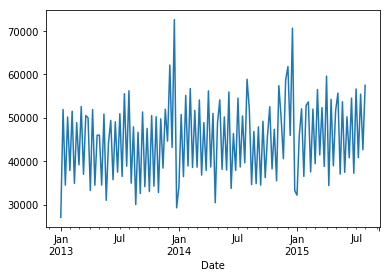

In [28]:
data_week = data_store.resample("W").sum()
data_week.plot()

In [190]:
look_back = 2

scaler = MinMaxScaler((0,1))
data_scaled = scaler.fit_transform(data_week.reshape(-1, 1))

convert_to_step = lambda interval: data_scaled[interval[0]:interval[1]]
intervals = zip(range(len(data_scaled) - look_back), range(look_back, len(data_scaled)))

conjunto = np.array(list(map(convert_to_step, intervals)))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [191]:
train, test = train_test_split(conjunto, shuffle=False)

In [192]:
X, y = train[:-1], train[1:, -1]
X_test, y_test = test[:-1], test[1:, -1]

In [206]:
model = keras.models.Sequential([
    keras.layers.Dense(input_shape=(look_back,), units=look_back, activation="sigmoid"),
    keras.layers.Dense(50, activation="sigmoid"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="mape")

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_60 (Dense)             (None, 50)                150       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 51        
Total params: 207
Trainable params: 207
Non-trainable params: 0
_________________________________________________________________


In [207]:
history = model.fit(X.reshape(-1, look_back), y, epochs=1000, validation_data=(X_test.reshape(-1, look_back), y_test))

Train on 98 samples, validate on 33 samples
Epoch 1/1000
98/98 [==============================]98/98 [==============================] - 0s 5ms/step - loss: 87.7467 - val_loss: 58.8293

Epoch 2/1000
98/98 [==============================]98/98 [==============================] - 0s 100us/step - loss: 82.3284 - val_loss: 55.3528

Epoch 3/1000
98/98 [==============================]98/98 [==============================] - 0s 114us/step - loss: 77.4471 - val_loss: 52.4478

Epoch 4/1000
98/98 [==============================]98/98 [==============================] - 0s 112us/step - loss: 72.7889 - val_loss: 49.6624

Epoch 5/1000
98/98 [==============================]98/98 [==============================] - 0s 95us/step - loss: 68.3344 - val_loss: 47.1456

Epoch 6/1000
98/98 [==============================]98/98 [==============================] - 0s 106us/step - loss: 64.2718 - val_loss: 45.1672

Epoch 7/1000
98/98 [==============================]98/98 [==============================] - 0s 95us/s


Epoch 58/1000
98/98 [==============================]98/98 [==============================] - 0s 84us/step - loss: 51.4006 - val_loss: 50.2842

Epoch 59/1000
98/98 [==============================]98/98 [==============================] - 0s 89us/step - loss: 51.4634 - val_loss: 50.3750

Epoch 60/1000
98/98 [==============================]98/98 [==============================] - 0s 99us/step - loss: 51.4490 - val_loss: 50.0669

Epoch 61/1000
98/98 [==============================]98/98 [==============================] - 0s 109us/step - loss: 51.4109 - val_loss: 49.4359

Epoch 62/1000
98/98 [==============================]98/98 [==============================] - 0s 77us/step - loss: 51.3421 - val_loss: 48.5117

Epoch 63/1000
98/98 [==============================]98/98 [==============================] - 0s 101us/step - loss: 51.1604 - val_loss: 47.5741

Epoch 64/1000
98/98 [==============================]98/98 [==============================] - 0s 104us/step - loss: 51.1872 - val_loss: 46.6


Epoch 115/1000
98/98 [==============================]98/98 [==============================] - 0s 75us/step - loss: 51.0919 - val_loss: 46.9894

Epoch 116/1000
98/98 [==============================]98/98 [==============================] - 0s 77us/step - loss: 51.0106 - val_loss: 47.5169

Epoch 117/1000
98/98 [==============================]98/98 [==============================] - 0s 95us/step - loss: 51.0293 - val_loss: 48.2807

Epoch 118/1000
98/98 [==============================]98/98 [==============================] - 0s 112us/step - loss: 51.1005 - val_loss: 48.8524

Epoch 119/1000
98/98 [==============================]98/98 [==============================] - 0s 97us/step - loss: 51.1961 - val_loss: 48.7810

Epoch 120/1000
98/98 [==============================]98/98 [==============================] - 0s 76us/step - loss: 51.1823 - val_loss: 48.3452

Epoch 121/1000
98/98 [==============================]98/98 [==============================] - 0s 89us/step - loss: 51.1110 - val_loss:

98/98 [==============================]98/98 [==============================] - 0s 93us/step - loss: 50.9199 - val_loss: 47.3525

Epoch 172/1000
98/98 [==============================]98/98 [==============================] - 0s 79us/step - loss: 51.0091 - val_loss: 48.0993

Epoch 173/1000
98/98 [==============================]98/98 [==============================] - 0s 92us/step - loss: 51.0839 - val_loss: 48.2562

Epoch 174/1000
98/98 [==============================]98/98 [==============================] - 0s 99us/step - loss: 51.0285 - val_loss: 47.7959

Epoch 175/1000
98/98 [==============================]98/98 [==============================] - 0s 86us/step - loss: 51.0090 - val_loss: 47.0119

Epoch 176/1000
98/98 [==============================]98/98 [==============================] - 0s 101us/step - loss: 50.8965 - val_loss: 46.2607

Epoch 177/1000
98/98 [==============================]98/98 [==============================] - 0s 95us/step - loss: 51.0392 - val_loss: 45.6602

Epoch 


Epoch 228/1000
98/98 [==============================]98/98 [==============================] - 0s 86us/step - loss: 51.2101 - val_loss: 44.3933

Epoch 229/1000
98/98 [==============================]98/98 [==============================] - 0s 75us/step - loss: 51.2569 - val_loss: 44.3174

Epoch 230/1000
98/98 [==============================]98/98 [==============================] - 0s 88us/step - loss: 51.3225 - val_loss: 44.3451

Epoch 231/1000
98/98 [==============================]98/98 [==============================] - 0s 99us/step - loss: 51.2852 - val_loss: 44.4089

Epoch 232/1000
98/98 [==============================]98/98 [==============================] - 0s 92us/step - loss: 51.2487 - val_loss: 44.3934

Epoch 233/1000
98/98 [==============================]98/98 [==============================] - 0s 107us/step - loss: 51.2367 - val_loss: 44.3974

Epoch 234/1000
98/98 [==============================]98/98 [==============================] - 0s 103us/step - loss: 51.2220 - val_loss

98/98 [==============================]98/98 [==============================] - 0s 91us/step - loss: 50.7885 - val_loss: 45.2970

Epoch 285/1000
98/98 [==============================]98/98 [==============================] - 0s 79us/step - loss: 50.6810 - val_loss: 46.0541

Epoch 286/1000
98/98 [==============================]98/98 [==============================] - 0s 89us/step - loss: 50.5936 - val_loss: 46.7956

Epoch 287/1000
98/98 [==============================]98/98 [==============================] - 0s 96us/step - loss: 50.6096 - val_loss: 47.0955

Epoch 288/1000
98/98 [==============================]98/98 [==============================] - 0s 90us/step - loss: 50.6854 - val_loss: 47.3127

Epoch 289/1000
98/98 [==============================]98/98 [==============================] - 0s 92us/step - loss: 50.6210 - val_loss: 46.9990

Epoch 290/1000
98/98 [==============================]98/98 [==============================] - 0s 110us/step - loss: 50.6163 - val_loss: 46.9586

Epoch 


Epoch 341/1000
98/98 [==============================]98/98 [==============================] - 0s 107us/step - loss: 50.5699 - val_loss: 47.9877

Epoch 342/1000
98/98 [==============================]98/98 [==============================] - 0s 79us/step - loss: 50.4592 - val_loss: 47.0118

Epoch 343/1000
98/98 [==============================]98/98 [==============================] - 0s 111us/step - loss: 50.3720 - val_loss: 46.3054

Epoch 344/1000
98/98 [==============================]98/98 [==============================] - 0s 95us/step - loss: 50.4055 - val_loss: 46.3848

Epoch 345/1000
98/98 [==============================]98/98 [==============================] - 0s 77us/step - loss: 50.3667 - val_loss: 46.9800

Epoch 346/1000
98/98 [==============================]98/98 [==============================] - 0s 134us/step - loss: 50.3879 - val_loss: 47.5325

Epoch 347/1000
98/98 [==============================]98/98 [==============================] - 0s 107us/step - loss: 50.4684 - val_lo

98/98 [==============================]98/98 [==============================] - 0s 82us/step - loss: 50.2702 - val_loss: 45.4217

Epoch 398/1000
98/98 [==============================]98/98 [==============================] - 0s 77us/step - loss: 50.1927 - val_loss: 46.7212

Epoch 399/1000
98/98 [==============================]98/98 [==============================] - 0s 118us/step - loss: 50.0852 - val_loss: 47.2540

Epoch 400/1000
98/98 [==============================]98/98 [==============================] - 0s 116us/step - loss: 50.2142 - val_loss: 47.3175

Epoch 401/1000
98/98 [==============================]98/98 [==============================] - 0s 75us/step - loss: 50.2093 - val_loss: 47.9186

Epoch 402/1000
98/98 [==============================]98/98 [==============================] - 0s 82us/step - loss: 50.2665 - val_loss: 48.3043

Epoch 403/1000
98/98 [==============================]98/98 [==============================] - 0s 105us/step - loss: 50.3001 - val_loss: 48.1151

Epoc

98/98 [==============================]98/98 [==============================] - 0s 94us/step - loss: 49.7337 - val_loss: 45.6279

Epoch 454/1000
98/98 [==============================]98/98 [==============================] - 0s 83us/step - loss: 49.7474 - val_loss: 45.1278

Epoch 455/1000
98/98 [==============================]98/98 [==============================] - 0s 76us/step - loss: 49.8820 - val_loss: 44.8102

Epoch 456/1000
98/98 [==============================]98/98 [==============================] - 0s 93us/step - loss: 49.8958 - val_loss: 44.8386

Epoch 457/1000
98/98 [==============================]98/98 [==============================] - 0s 87us/step - loss: 49.8665 - val_loss: 44.7763

Epoch 458/1000
98/98 [==============================]98/98 [==============================] - 0s 90us/step - loss: 49.8661 - val_loss: 44.9653

Epoch 459/1000
98/98 [==============================]98/98 [==============================] - 0s 108us/step - loss: 49.7484 - val_loss: 45.4975

Epoch 

98/98 [==============================]98/98 [==============================] - 0s 87us/step - loss: 49.3160 - val_loss: 46.5677

Epoch 510/1000
98/98 [==============================]98/98 [==============================] - 0s 82us/step - loss: 49.3332 - val_loss: 46.2528

Epoch 511/1000
98/98 [==============================]98/98 [==============================] - 0s 86us/step - loss: 49.2755 - val_loss: 46.3371

Epoch 512/1000
98/98 [==============================]98/98 [==============================] - 0s 99us/step - loss: 49.2671 - val_loss: 46.4094

Epoch 513/1000
98/98 [==============================]98/98 [==============================] - 0s 87us/step - loss: 49.2419 - val_loss: 46.1822

Epoch 514/1000
98/98 [==============================]98/98 [==============================] - 0s 97us/step - loss: 49.2204 - val_loss: 46.3159

Epoch 515/1000
98/98 [==============================]98/98 [==============================] - 0s 109us/step - loss: 49.2940 - val_loss: 47.3015

Epoch 


Epoch 566/1000
98/98 [==============================]98/98 [==============================] - 0s 95us/step - loss: 48.6249 - val_loss: 45.3491

Epoch 567/1000
98/98 [==============================]98/98 [==============================] - 0s 102us/step - loss: 48.5704 - val_loss: 45.0363

Epoch 568/1000
98/98 [==============================]98/98 [==============================] - 0s 82us/step - loss: 48.6375 - val_loss: 44.9182

Epoch 569/1000
98/98 [==============================]98/98 [==============================] - 0s 102us/step - loss: 48.6737 - val_loss: 44.7157

Epoch 570/1000
98/98 [==============================]98/98 [==============================] - 0s 106us/step - loss: 48.7099 - val_loss: 44.5438

Epoch 571/1000
98/98 [==============================]98/98 [==============================] - 0s 112us/step - loss: 48.7383 - val_loss: 44.3971

Epoch 572/1000
98/98 [==============================]98/98 [==============================] - 0s 137us/step - loss: 48.8195 - val_l

98/98 [==============================]98/98 [==============================] - 0s 89us/step - loss: 48.0430 - val_loss: 46.3274

Epoch 623/1000
98/98 [==============================]98/98 [==============================] - 0s 90us/step - loss: 48.0255 - val_loss: 46.0333

Epoch 624/1000
98/98 [==============================]98/98 [==============================] - 0s 88us/step - loss: 47.8883 - val_loss: 45.6264

Epoch 625/1000
98/98 [==============================]98/98 [==============================] - 0s 88us/step - loss: 47.8025 - val_loss: 45.3381

Epoch 626/1000
98/98 [==============================]98/98 [==============================] - 0s 89us/step - loss: 47.7953 - val_loss: 45.4328

Epoch 627/1000
98/98 [==============================]98/98 [==============================] - 0s 119us/step - loss: 47.7917 - val_loss: 45.2721

Epoch 628/1000
98/98 [==============================]98/98 [==============================] - 0s 115us/step - loss: 47.8055 - val_loss: 45.0408

Epoch


Epoch 679/1000
98/98 [==============================]98/98 [==============================] - 0s 94us/step - loss: 47.1481 - val_loss: 46.1433

Epoch 680/1000
98/98 [==============================]98/98 [==============================] - 0s 87us/step - loss: 47.1420 - val_loss: 46.6182

Epoch 681/1000
98/98 [==============================]98/98 [==============================] - 0s 80us/step - loss: 47.3829 - val_loss: 47.5454

Epoch 682/1000
98/98 [==============================]98/98 [==============================] - 0s 77us/step - loss: 47.5125 - val_loss: 47.8813

Epoch 683/1000
98/98 [==============================]98/98 [==============================] - 0s 91us/step - loss: 47.5328 - val_loss: 47.6392

Epoch 684/1000
98/98 [==============================]98/98 [==============================] - 0s 129us/step - loss: 47.4636 - val_loss: 47.1461

Epoch 685/1000
98/98 [==============================]98/98 [==============================] - 0s 116us/step - loss: 47.2338 - val_loss

98/98 [==============================]98/98 [==============================] - 0s 94us/step - loss: 45.9318 - val_loss: 44.2733

Epoch 736/1000
98/98 [==============================]98/98 [==============================] - 0s 78us/step - loss: 45.8960 - val_loss: 44.2862

Epoch 737/1000
98/98 [==============================]98/98 [==============================] - 0s 93us/step - loss: 45.8989 - val_loss: 44.2712

Epoch 738/1000
98/98 [==============================]98/98 [==============================] - 0s 86us/step - loss: 45.8233 - val_loss: 44.3825

Epoch 739/1000
98/98 [==============================]98/98 [==============================] - 0s 74us/step - loss: 45.7879 - val_loss: 44.4667

Epoch 740/1000
98/98 [==============================]98/98 [==============================] - 0s 91us/step - loss: 45.7062 - val_loss: 44.6242

Epoch 741/1000
98/98 [==============================]98/98 [==============================] - 0s 110us/step - loss: 45.6894 - val_loss: 44.7925

Epoch 

98/98 [==============================]98/98 [==============================] - 0s 81us/step - loss: 44.7141 - val_loss: 44.1619

Epoch 792/1000
98/98 [==============================]98/98 [==============================] - 0s 87us/step - loss: 44.8056 - val_loss: 44.0617

Epoch 793/1000
98/98 [==============================]98/98 [==============================] - 0s 107us/step - loss: 44.7706 - val_loss: 44.1913

Epoch 794/1000
98/98 [==============================]98/98 [==============================] - 0s 84us/step - loss: 44.6197 - val_loss: 44.6973

Epoch 795/1000
98/98 [==============================]98/98 [==============================] - 0s 94us/step - loss: 44.7740 - val_loss: 45.3806

Epoch 796/1000
98/98 [==============================]98/98 [==============================] - 0s 111us/step - loss: 44.7127 - val_loss: 45.5698

Epoch 797/1000
98/98 [==============================]98/98 [==============================] - 0s 115us/step - loss: 44.7622 - val_loss: 45.7096

Epoc

98/98 [==============================]98/98 [==============================] - 0s 86us/step - loss: 43.3585 - val_loss: 44.2486

Epoch 848/1000
98/98 [==============================]98/98 [==============================] - 0s 79us/step - loss: 43.3034 - val_loss: 44.1693

Epoch 849/1000
98/98 [==============================]98/98 [==============================] - 0s 92us/step - loss: 43.2976 - val_loss: 43.9888

Epoch 850/1000
98/98 [==============================]98/98 [==============================] - 0s 97us/step - loss: 43.3034 - val_loss: 43.8103

Epoch 851/1000
98/98 [==============================]98/98 [==============================] - 0s 78us/step - loss: 43.3251 - val_loss: 43.6865

Epoch 852/1000
98/98 [==============================]98/98 [==============================] - 0s 90us/step - loss: 43.4032 - val_loss: 43.7155

Epoch 853/1000
98/98 [==============================]98/98 [==============================] - 0s 112us/step - loss: 43.2696 - val_loss: 44.2392

Epoch 


Epoch 904/1000
98/98 [==============================]98/98 [==============================] - 0s 85us/step - loss: 42.1635 - val_loss: 44.6713

Epoch 905/1000
98/98 [==============================]98/98 [==============================] - 0s 76us/step - loss: 41.7227 - val_loss: 44.5664

Epoch 906/1000
98/98 [==============================]98/98 [==============================] - 0s 103us/step - loss: 41.6980 - val_loss: 44.7021

Epoch 907/1000
98/98 [==============================]98/98 [==============================] - 0s 86us/step - loss: 41.7057 - val_loss: 44.4916

Epoch 908/1000
98/98 [==============================]98/98 [==============================] - 0s 77us/step - loss: 41.5924 - val_loss: 44.0588

Epoch 909/1000
98/98 [==============================]98/98 [==============================] - 0s 79us/step - loss: 41.5470 - val_loss: 43.5305

Epoch 910/1000
98/98 [==============================]98/98 [==============================] - 0s 89us/step - loss: 41.6431 - val_loss:

98/98 [==============================]98/98 [==============================] - 0s 94us/step - loss: 40.1457 - val_loss: 43.8894

Epoch 961/1000
98/98 [==============================]98/98 [==============================] - 0s 102us/step - loss: 40.0738 - val_loss: 43.6122

Epoch 962/1000
98/98 [==============================]98/98 [==============================] - 0s 101us/step - loss: 40.1228 - val_loss: 43.2005

Epoch 963/1000
98/98 [==============================]98/98 [==============================] - 0s 86us/step - loss: 40.0337 - val_loss: 43.0508

Epoch 964/1000
98/98 [==============================]98/98 [==============================] - 0s 95us/step - loss: 40.1811 - val_loss: 42.8908

Epoch 965/1000
98/98 [==============================]98/98 [==============================] - 0s 120us/step - loss: 40.0474 - val_loss: 42.9358

Epoch 966/1000
98/98 [==============================]98/98 [==============================] - 0s 102us/step - loss: 39.9927 - val_loss: 42.9906

Epo

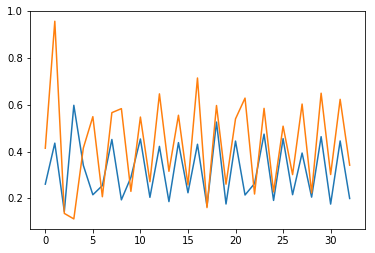

In [202]:
plt.plot(model.predict(X_test.reshape(-1, look_back)))
plt.plot(y_test)

In [196]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [197]:
y_test_descaled = scaler.inverse_transform(y_test)

In [203]:
y_hat_descaled = scaler.inverse_transform(model.predict(X_test.reshape(-1, look_back)))

In [204]:
mape(y_test_descaled, y_hat_descaled)

14.128289587914097